In [2]:
# HIDDEN
from datascience import *
from datascience.predicates import are
import numpy as np
import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Welfare subsidies in Mexico
In rural Mexican villages in the 1990’s,
children in poor families were often not enrolled in school. One of the reasons
was that the older children could go to work and thus help support the family.
Santiago Levy , a minister in Mexican Ministry of Finance, set out to
investigate whether welfare programs could be used to increase school enrollment
and improve health conditions. He conducted an RCT on a set of villages,
selecting some of them at random to receive a new welfare program called
PROGRESA. The program gave money to poor families if their children went to
school regularly and the family used preventive health care. More money was
given if the children were in secondary school than in primary school, to
compensate for the children’s lost wages, and more money was given for girls
attending school than for boys. The remaining villages did not get this
treatment, and formed the control group.

Because of the randomization, there were no confounding factors; all possible
confounding factors are *approximately the same* the treatment and control groups.
The following scatter plot, for example, shows the *distance to the nearest city*
(a potentially-important factor in education, health, and economic growth) in a
small sample of the villages in the treatment and control groups.  There is no distinguishable pattern of differences.

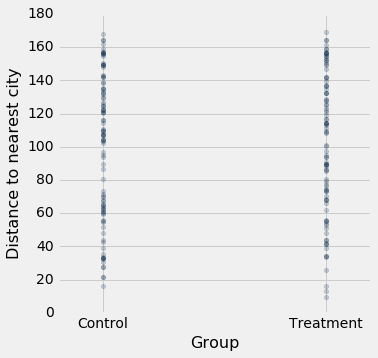

In [127]:
investments = Table.read_table("progresa_sample.csv")
investments.scatter('Group', "Distance to nearest city", alpha=.2)
# We relabel the axes for clarity:
plots.xticks([0, 1], ['Control', 'Treatment']);

Actually, this scatter plot is not so helpful for seeing the difference in the pattern of distances.  A better visualization for data like this is a *histogram*.  The plot below shows two overlapping histograms, one for the treatment group and one for the control.  Each histogram is like one of the columns of dots in the scatter plot, but flipped 90 degress onto its side, and with bars to show the concentration of dots.  Since the blue and gold bars mostly overlap, there isn't much difference in the pattern of distances.

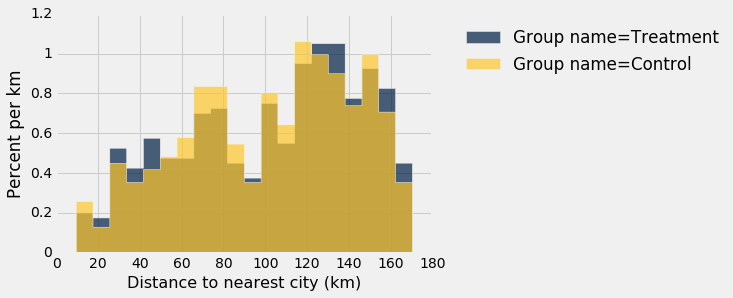

In [126]:
investments_full = Table.read_table("progresa.csv")
investments_full.hist('Distance to nearest city', group='Group name', bins=20, unit="km")
plots.xlabel("Distance to nearest city (km)");

The lack of confounding factors facilitated by randomization made it possible to
establish that PROGRESA caused an increase in school enrollment.

### Investment income
PROGRESA provides an opportunity for us to study the other effects of giving money to poor families.  For example, a family receiving money for school and health care might spend some of the money on other investments, like livestock or land improvements.  A group of Harvard researchers investigated the effect of PROGRESA benefits on families' later *investment income*.

Below is a scatter plot and matching histogram for investment income.  The blue bars are generally further to the right than the yellow bars.  That means villages in the treatment group tended to have higher investment income than villages in the control group.

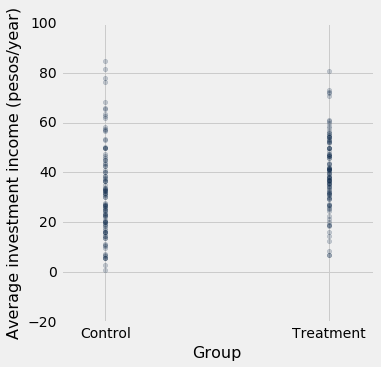

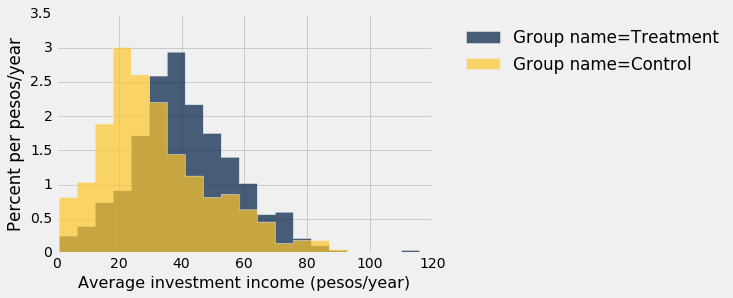

In [132]:
investments.scatter('Group', "Average investment income (pesos/year)", alpha=.2)
# We relabel the axes for clarity:
plots.xticks([0, 1], ['Control', 'Treatment']);
investments_full.hist("Average investment income (pesos/year)", group="Group name", unit="pesos/year", bins=20)
plots.xlabel("Average investment income (pesos/year)");

Again, since randomization ensures that confounding factors are approximately equal across the two groups, we can safely say that the higher investment income was *caused* by PROGRESA.

PROGRESA was later adopted nationwide in Mexico under the name Oportunidades.

### Why don't we conduct RCTs to answer every question?
In many situations it might not be possible to carry out a randomized controlled
experiment, even when the aim is to investigate causality. For example, suppose
you want to study the effects of alcohol consumption during pregnancy, and you
randomly assign some pregnant women to your "alcohol" group. You should not
expect cooperation from them if you present them with a drink. In such
situations you will almost invariably be conducting an observational study, not
an experiment. Be alert for confounding factors.